# TF-IDF, Bag-of-words

## Что такое корпус текстов?

**Корпус текстов** — это большой набор текстовых данных, который используется для задач обработки естественного языка (NLP). Он может состоять из документов различного типа, включая книги, статьи, посты в социальных сетях, и любые другие текстовые материалы. Корпус текстов используется для обучения моделей машинного обучения, таких как BERT, GPT, и других.

Пример корпуса текстов:
- Новостные статьи: Тексты новостных сайтов или газет.
Пример: Корпус статей New York Times.

- Твиты: Набор сообщений с Twitter.

Пример: Корпус из твитов для анализа настроений.

- Википедия: Огромная база текстов из Википедии, которая часто используется для предобучения моделей.

Пример: Корпус Wikipedia, который использовался для обучения BERT.

- Книги: Собрание художественных или научных книг.

Пример: Google Books Ngram Corpus, который содержит данные о частотах фраз и слов в книгах.

- Официальные документы: Юридические документы, законы, постановления.

 Пример: Корпус юридических документов для анализа законов и юридических прецедентов.

## Как из корпуса выделяется отдельный документ?

Для того чтобы выделить отдельный документ из корпуса текстов, необходимо учитывать структуру корпуса и способ хранения данных. Вот основные подходы:

1. **Явное разделение документов**:
   - **Структурированные данные**: Если корпус представляет собой файл, где документы явно разделены (например, каждая статья хранится в отдельном файле или запись в базе данных), то выделение документа просто сводится к доступу к нужной записи или файлу.
   - Пример: если корпус состоит из набора статей, каждая из которых хранится в формате `.txt`, то каждый такой файл является отдельным документом.

2. **Сегментация внутри единого файла**:
   - **Метаданные**: В некоторых случаях тексты могут быть собраны в одном файле, а границы документов указываются с помощью специальных маркеров, меток или тегов (например, в JSON, XML или текстовом файле с разделителями).
   - Пример:
     ```json
     {
       "documents": [
         {"title": "Документ 1", "text": "Текст первого документа..."},
         {"title": "Документ 2", "text": "Текст второго документа..."}
       ]
     }
     ```
     Здесь можно выделить отдельный документ, обратившись к нужной записи с помощью ключа, например, `documents[0]["text"]`.

3. **По предложениям или абзацам**:
   - Иногда корпус текстов может быть не структурирован как набор отдельных файлов. В таких случаях, чтобы выделить документ, можно использовать естественные языковые единицы, такие как предложения или абзацы.
   - Пример: Если в корпусе статьи или книги хранятся как единый текст, можно разбить его на отдельные документы, ориентируясь на маркеры конца абзацев (например, двойные переводы строки) или специальные заголовки.

4. **Построчный или по строкам данных**:
   - В корпусах, таких как логи, твиты или данные из форумов, каждый документ может быть представлен одной строкой текста. В таких случаях каждый отдельный документ — это одна строка файла.
   - Пример: Каждая строка файла CSV может представлять собой отдельный документ.
     ```
     Tweet1: "Я люблю NLP!"
     Tweet2: "Машинное обучение – это здорово!"
     ```


5. **Выделение документа по ключевым метаданным**:
   - Если корпус содержит метаданные, такие как заголовки, авторы, даты публикаций, можно выделить документы по этим метаданным. Например, в корпусе новостей можно выделить все документы, опубликованные в определенную дату или написанные конкретным автором.

Когда используется:

- **Обучение моделей**: При подготовке данных для обучения NLP-моделей, таких как BERT или GPT, важно разделить корпус на отдельные документы, которые будут использоваться для подачи в модель.
- **Поисковые системы**: При реализации поиска, каждый документ корпуса рассматривается как отдельный элемент для индексации и поиска по ключевым словам.

Таким образом, выделение документа зависит от структуры корпуса и используемого формата данных. Если корпус структурирован, задача сводится к выборке нужной записи или файла; в случае неструктурированных данных, можно ориентироваться на текстовые разделители, такие как абзацы или предложения.

## Расскажи про tf-idf? Как мы получаем эмбеддинги в tf-idf

Эмбеддинги на основе **TF-IDF** (Term Frequency - Inverse Document Frequency) представляют собой числовые векторы, которые отражают важность слов в документе относительно корпуса документов. TF-IDF — это один из методов, который использует статистический подход для вычисления представления слов в тексте.

**Шаги получения эмбеддингов с помощью TF-IDF:**

1. **Выбор корпуса текстов**: Допустим, у нас есть набор документов (корпус). Каждый документ — это набор слов (терминов), и наша цель — получить числовое представление каждого документа.

2. **TF (частотность термина)**:
   - **TF** (Term Frequency) — это частота встречаемости термина в документе. Она рассчитывается по формуле:

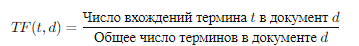

   Таким образом, чем чаще слово встречается в документе, тем выше его TF.

3. **IDF (обратная частотность документа)**:
   - **IDF** (Inverse Document Frequency) измеряет важность термина по всему корпусу. Она уменьшается для слов, которые часто встречаются во многих документах, поскольку такие слова менее информативны.

 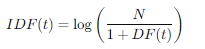

   где \(N\) — это общее количество документов в корпусе, а \(DF(t)\) — количество документов, в которых встречается термин \(t\). Если термин встречается в большинстве документов, его IDF будет низким, и наоборот.

4. **Расчет TF-IDF**:
   После вычисления TF и IDF для каждого термина, их произведение даст взвешенную частоту термина с учетом его редкости:



   Это значение представляет собой вес каждого слова в документе.

5. **Представление документа как вектора**:
   - Каждый документ можно представить в виде вектора, где каждое измерение соответствует определенному термину из словаря (всех уникальных слов корпуса), а значение — это TF-IDF для данного термина. Таким образом, документ с \(n\) уникальными терминами будет представлен вектором размерности \(n\).

6. **Нормализация**: Векторы документов могут быть нормализованы (например, по длине), чтобы учесть разницу в длине текстов и улучшить их сравнение.

Пример:
Допустим, у нас есть два документа:

- Документ 1: "Кот любит молоко"
- Документ 2: "Собака любит мясо"

После токенизации мы получаем следующие слова: ["Кот", "любит", "молоко", "Собака", "мясо"]. Для каждого слова считаем TF-IDF в каждом документе, где редко встречающиеся слова (например, "молоко" и "мясо") получат более высокий вес, чем частое слово "любит".

 Особенности эмбеддингов TF-IDF:
- **Семантика**: TF-IDF эмбеддинги не учитывают контекст слов. Каждое слово имеет фиксированный вес, основанный на его частоте, без учета порядка слов или зависимостей между ними.
- **Ограниченность векторного пространства**: Векторное пространство зависит от числа уникальных слов в корпусе, что может приводить к большой размерности.

 Преимущества TF-IDF:
- Простой и быстрый в реализации.
- Хорошо работает для задач классификации текстов или поиска, где важно выявить ключевые слова.

Недостатки:
- **Не учитывает семантические связи**: Слова, схожие по смыслу, но разные по написанию, будут иметь совершенно разные векторы.
- **Нечувствительность к порядку слов**: Модель не учитывает синтаксические структуры или контексты, что ограничивает её способность к пониманию сложных фраз.

**Заключение:**

TF-IDF предоставляет базовый способ создания эмбеддингов, где учитывается важность слова в конкретном документе относительно всего корпуса. Этот метод часто используется для задач информационного поиска, но современные подходы, такие как Word2Vec, GloVe, и BERT, заменяют его, так как они лучше справляются с захватом контекста и семантических связей между словами.

## Что такое эмбдеддинг применительно к задачам nlp?

**Эмбеддинг** (embedding) — это способ представления слов или фраз в виде числовых векторов фиксированной размерности, который используется в задачах обработки естественного языка (NLP). Эти векторы представляют собой плотные (dense) представления данных, где схожие по смыслу слова имеют близкие векторы в многомерном пространстве. Эмбеддинги позволяют моделям машинного обучения эффективно обрабатывать текст, который в исходной форме является набором слов.

 Как работают эмбеддинги?

Слова представляются в виде числовых векторов, и каждая координата этого вектора представляет скрытую характеристику или признак слова. Модель, обучаясь, находит такие представления, которые помогают учитывать смысловые и синтаксические взаимосвязи между словами. Например, модель может научиться, что слова "король" и "королева" имеют похожие векторы с различием, связанным с полом.

 Основные задачи, решаемые с помощью эмбеддингов:
1. **Семантическое представление слов**: Слова, которые имеют схожее значение или контекст, будут располагаться близко в пространстве эмбеддингов.
2. **Снижение размерности**: Эмбеддинги уменьшают высокоразмерные представления текста (например, one-hot encoding), что облегчает обучение моделей.
3. **Учет контекста**: Современные методы, такие как контекстные эмбеддинги, могут учитывать положение и значение слова в зависимости от контекста в предложении.

 Примеры методов эмбеддингов:
1. **Word2Vec**: Создает статичные эмбеддинги для слов, где каждое слово представлено фиксированным вектором вне зависимости от контекста.
   - **CBOW** (Continuous Bag of Words) и **Skip-gram** — два варианта этой модели.
   
2. **GloVe** (Global Vectors for Word Representation): Статичный метод, который обучает вектора слов на основе их ко-частотности в корпусе текста.

3. **FastText**: Расширяет Word2Vec, добавляя обработку подслов (subword), что позволяет лучше работать с редкими словами или словами с похожими корнями.

4. **Контекстные эмбеддинги** (contextual embeddings):
   - **BERT**: Каждое слово представляется по-разному в зависимости от контекста в предложении. Например, "bank" будет иметь разные представления в контексте "на берегу реки" и "в банке".
   - **GPT, RoBERTa, T5**: Эти модели также генерируют контекстные эмбеддинги, которые учитывают порядок и зависимость слов в предложении.

Статичные vs Контекстные эмбеддинги:
- **Статичные эмбеддинги** (например, Word2Vec, GloVe) дают одно фиксированное представление для каждого слова, независимо от его контекста.
- **Контекстные эмбеддинги** (например, BERT, GPT) создают разные представления для одного и того же слова в зависимости от его окружения в предложении.

 Пример эмбеддингов:
Предположим, у нас есть два слова: "собака" и "кошка". В статичных методах они могут быть представлены следующими векторами:

- Собака: [0.5, -0.3, 0.8, ...]
- Кошка: [0.4, -0.2, 0.9, ...]

Контекстные модели же дадут разное представление одного и того же слова в зависимости от его использования в предложении. Например, "банк" в разных контекстах будет иметь разные вектора.

**Вывод:**

Эмбеддинги являются важной частью современного NLP, поскольку позволяют моделям обрабатывать текстовые данные, представленные в векторной форме. Они облегчают обучение моделей и способствуют улучшению их способности учитывать семантические и синтаксические связи между словами.

## Чем эмбеддинги bert отличается от эмбеддингов tf-idf?

Эмбеддинги, генерируемые моделями **BERT** и методом **TF-IDF**, существенно различаются в своей природе, назначении и способе получения.

1. **TF-IDF эмбеддинги**:
   - **Природа**: Это статистический метод, который использует частотные характеристики слов в документе и по всему корпусу для их представления в виде числовых векторов. 
   - **Как работает**: TF-IDF (Term Frequency-Inverse Document Frequency) измеряет важность слова в контексте конкретного документа и всего корпуса:
     - **TF (Term Frequency)**: Частота появления слова в документе.
     - **IDF (Inverse Document Frequency)**: Обратная частота появления слова во всех документах, которая снижает вес часто встречающихся слов (например, предлогов).
   - **Эмбеддинг**: Каждый документ представляется вектором размерности, равной количеству уникальных слов в корпусе. Вектор каждого слова содержит вес TF-IDF.
   - **Ограничения**:
     - Это **не контекстуальные** эмбеддинги, т.е. одно и то же слово всегда имеет одно и то же представление вне зависимости от его контекста.
     - TF-IDF **не учитывает порядок слов** и не передает синтаксические или семантические зависимости.

   Пример:
   Для корпуса с документами, содержащими слова "машинное обучение", TF-IDF присвоит числовые веса каждому слову в зависимости от его частоты в документе и корпусе.

2. **BERT эмбеддинги**:
   - **Природа**: BERT — это нейронная сеть трансформерного типа, которая обучается на больших объемах данных с целью моделирования контекстных связей между словами.
   - **Как работает**: BERT использует механизм внимания, чтобы учитывать весь контекст предложения при создании эмбеддингов. Это позволяет ему создавать **контекстно-зависимые** представления слов, где одно и то же слово может иметь разное представление в зависимости от контекста (например, слово "банк" в значении финансового учреждения и берег реки).
   - **Эмбеддинг**: Каждое слово представляется вектором фиксированной длины (например, 768 для BERT Base). Эти эмбеддинги учитывают как позицию слова в предложении, так и его контекст.
   - **Преимущества**:
     - BERT понимает контекст слова, синтаксис и семантические зависимости между словами.
     - Эмбеддинги BERT используются для более сложных задач, таких как классификация текста, извлечение сущностей, перевод и т.д.

   Пример:
   В предложениях "банк реки" и "банк кредитов" эмбеддинги для слова "банк" будут различаться, так как BERT учитывает контекст каждого использования.

**Сравнение:**

| Характеристика          | **TF-IDF**                               | **BERT**                                   |
|-------------------------|------------------------------------------|--------------------------------------------|
| **Тип эмбеддингов**      | Неконтекстуальные, базируются на частотах | Контекстуальные, основаны на трансформерах |
| **Размерность векторов** | Зависит от размера словаря               | Фиксированная для каждой модели (например, 768) |
| **Контекст**             | Не учитывает контекст                    | Учитывает полный контекст предложения      |
| **Операции**             | Матричные операции с частотами слов      | Нейросетевая модель                       |
| **Использование порядка слов** | Нет                                   | Да                                         |
| **Применение**           | Простой поиск и классификация текста      | Сложные задачи NLP (вопрос-ответ, NER и т.д.) |

**Когда использовать:**

- **TF-IDF**:
  - Для **простых задач**, например, классификации документов или поиска, когда контекст не важен.
  - Когда необходимо **быстрое вычисление** векторных представлений.
  
- **BERT**:
  - Для **сложных задач**, где контекст имеет значение (анализ тональности, перевод текста, задачи генерации текста).
  - Когда требуется глубокое понимание семантики и синтаксиса языка.

Таким образом, BERT предлагает гораздо более мощное и контекстно-чувствительное представление текста по сравнению с TF-IDF, что делает его более подходящим для современных задач NLP, хотя и с более высокими вычислительными затратами.

## Как отличаются размерности эмбеддинговгов в TF-IDF и BERT?

Размерности эмбеддингов в **TF-IDF** и **BERT** существенно различаются как по подходу к их вычислению, так и по их представлению в пространстве векторов. Вот ключевые различия:

 1. **TF-IDF**:

- **Размерность эмбеддинга**: Вектор TF-IDF имеет размерность, равную количеству уникальных слов в корпусе, что напрямую зависит от размера словаря (vocab size). Чем больше корпус, тем больше размерность вектора.
  - Например, если в корпусе 10,000 уникальных слов, размерность каждого TF-IDF вектора будет 10,000.
  - Размерность TF-IDF зависит от размера корпуса и может сильно варьироваться.

- **Особенности**:
  - Размерность растет с увеличением размера словаря.
  - Один и тот же векторный размер для всех документов.
  - Каждый элемент вектора — это взвешенное значение для конкретного слова в документе.

 2. **BERT**:

- **Размерность эмбеддинга**: Векторное представление каждого токена, полученное BERT, имеет фиксированную размерность, которая зависит от архитектуры модели. Для базовой модели BERT (BERT Base), размерность эмбеддинга — **768**. Для BERT Large — **1024**.
  - Каждый токен (слово или часть слова) представляется вектором фиксированной длины (например, 768).
  - Итоговый эмбеддинг для всего предложения или документа может быть получен путем агрегации векторов для всех токенов, например, усреднением или использованием CLS-токена.

- **Особенности**:
  - Независимо от длины предложения, каждый токен всегда будет иметь фиксированную длину эмбеддинга (например, 768 для BERT Base).
  - BERT использует контекстно-зависимые представления, которые изменяются в зависимости от соседних слов.

Сравнение:

| Характеристика               | **TF-IDF**                                           | **BERT**                                      |
|------------------------------|-----------------------------------------------------|-----------------------------------------------|
| **Размерность эмбеддинга**    | Зависит от количества уникальных слов в корпусе     | Фиксированная: 768 (BERT Base) или 1024 (BERT Large) |
| **Контекстуальность**         | Неконтекстуальные представления                     | Контекстуальные эмбеддинги                    |
| **Зависимость от размера корпуса** | Да                                              | Нет                                           |
| **Способ представления**      | Вектор с весами TF-IDF для каждого слова в документе | Векторное представление для каждого токена, учитывающее контекст |

Итог:
- **TF-IDF** эмбеддинги имеют переменную размерность, зависящую от количества уникальных слов в корпусе, и не учитывают контекст.
- **BERT** эмбеддинги всегда имеют фиксированную размерность (768 или 1024) и учитывают контекст предложения, обеспечивая более точное семантическое представление текста.

Когда размерность важна, использование TF-IDF может быть оправдано для небольших корпусов или простых задач, но для контекстно-чувствительных приложений, таких как понимание семантики текста, **BERT** более предпочтителен.

## Расскажи про bag of words

**Bag of Words (BoW)** — это простой метод представления текстовых данных в виде векторов, который часто используется в задачах обработки естественного языка (NLP).

Основные принципы:

1. **Представление текста**:
   - BoW игнорирует порядок слов и рассматривает документ как "мешок" слов.
   - Каждое слово в тексте рассматривается как элемент вектора.

2. **Создание словаря**:
   - Из всех текстов создается список всех уникальных слов (словарь).
   - Каждый документ представляется вектором, где каждая позиция соответствует какому-то слову из словаря, а значение позиции — это количество появлений слова в документе.

3. **Пример**:
   - Если в корпусе текстов есть три документа:
     1. "кошка сидит на дереве"
     2. "собака сидит под деревом"
     3. "птица сидит на дереве"
   
   Словарь может выглядеть так: ["кошка", "собака", "сидит", "на", "дереве", "под", "деревом", "птица"].
   Вектор для первого документа будет: [1, 0, 1, 1, 1, 0, 0, 0] (1 — слово встречается, 0 — не встречается).

4. **Ограничения**:
   - Не учитывает порядок слов (то есть теряет информацию о структуре предложения).
   - Не учитывает значения слов и контекст (например, синонимы рассматриваются как разные слова).
   
BoW эффективен для простых задач классификации текста или анализа частотности, но более сложные задачи (например, семантический анализ) требуют более продвинутых методов, таких как TF-IDF или трансформерные модели (например, BERT).

## Чем tf-idf лучше, чем bag-of-words?

**TF-IDF** (Term Frequency-Inverse Document Frequency) обладает рядом преимуществ по сравнению с **Bag of Words (BoW)**, особенно когда необходимо учитывать важность слов в контексте всего корпуса документов.

 1. **Взвешивание слов**:
   - **BoW** просто подсчитывает количество появлений слова в документе, что делает этот метод нечувствительным к значимости слов. Часто встречающиеся, но малозначимые слова (например, "и", "в", "на") получают высокий вес, хотя они не несут важной информации.
   - **TF-IDF** устраняет эту проблему, уменьшая вес часто встречающихся слов в корпусе, что позволяет фокусироваться на более информативных и специфичных для документа терминах. Часто встречающиеся слова (такие как "the", "is") получают низкий вес, а редкие, но значимые слова — высокий.

 2. **Контекстное значение**:
   - **BoW** не учитывает, в каких документах слово встречается, а просто использует его частоту. Это приводит к тому, что общие слова получают высокие веса даже в разных контекстах.
   - **TF-IDF** использует компонент **Inverse Document Frequency** (IDF), который снижает вес слов, часто встречающихся в разных документах, и повышает вес редких слов, тем самым лучше отражая значимость слов в контексте определенных документов.

 3. **Фильтрация неинформативных слов**:
   - **BoW** не различает важные и неважные слова, что может негативно сказаться на качестве результатов при использовании метода для задач классификации или кластеризации.
   - **TF-IDF** помогает фильтровать неинформативные слова (например, стоп-слова) за счет их низкого IDF веса, что улучшает качество текстовых представлений.

**Пример**:
Допустим, есть два документа:
1. "Кошка сидит на дереве."
2. "Собака сидит под деревом."

- В **BoW** каждый документ будет представлен вектором на основе частот слов. Оба слова "сидит" и "дерево" будут иметь одинаковое значение, хотя они часто встречаются.
- В **TF-IDF**, слова "сидит" и "дерево" могут иметь более низкие веса из-за их частого появления, а более редкие слова, такие как "кошка" или "собака", получат более высокий вес, так как они уникальны для документов.

### 4. **Устойчивость к шуму**:
   - **BoW** может быть подвержен шуму, особенно если в корпусе много часто встречающихся слов.
   - **TF-IDF** уменьшает влияние таких слов, что делает модель более устойчивой к шуму и улучшает производительность в задачах, таких как классификация или кластеризация.

 Итог:
- **TF-IDF** лучше подходит для задач, где важно учитывать значимость слов в контексте корпуса, тогда как **BoW** просто подсчитывает частоту и не оценивает важность слов.


# RNN

## Как работает RNN?

Рекуррентная нейронная сеть (RNN, **Recurrent Neural Network**) — это тип нейронной сети, который используется для обработки последовательных данных, таких как временные ряды, текст, аудио или видео. Основное отличие RNN от обычных нейронных сетей заключается в том, что RNN имеет рекуррентные связи, которые позволяют ей учитывать информацию из предыдущих шагов в последовательности. Это делает RNN подходящей для задач, где важен контекст и зависимость данных во времени.

Как работает RNN:

1. **Входные данные**: На каждом временном шаге сеть получает входные данные. Например, если это текст, то на каждом шаге RNN может получать одно слово или символ.

2. **Рекуррентные связи**: В RNN на каждом шаге вычисляется новое скрытое состояние (hidden state), которое зависит как от текущего входного значения, так и от скрытого состояния на предыдущем шаге. Это ключевая особенность RNN — сохранение информации о предыдущих шагах, что позволяет учитывать контекст.

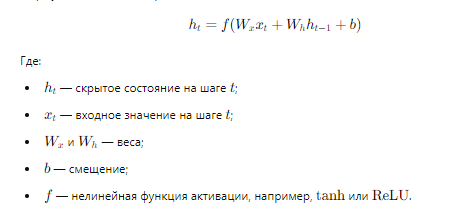

3. **Выходные данные**: После обработки каждого входного шага сеть может выдавать выходное значение. Это может быть либо предсказание для каждого шага, либо итоговое предсказание по всему набору данных.

4. **Затухание или взрыв градиентов**: Один из главных недостатков базовых RNN заключается в том, что при обучении методом обратного распространения ошибки через время (BPTT — Backpropagation Through Time) градиенты могут затухать (vanishing gradients) или "взрываться" (exploding gradients). Это делает обучение долгих последовательностей сложным, так как сеть теряет важную информацию из-за малых градиентов.


RNN отлично подходит для задач, где важно учитывать последовательность или зависимость данных от времени, но их базовые версии имеют свои ограничения, что привело к созданию более сложных архитектур, таких как LSTM и GRU.

## Почему в RNN градиенты затухают?

Затухание градиентов в рекуррентных нейронных сетях (RNN) связано с тем, как работает метод обратного распространения ошибки через время (BPTT — Backpropagation Through Time). Проблема возникает при обучении сети на длинных последовательностях, когда вклад информации от предыдущих шагов постепенно уменьшается и становится слишком мал, чтобы повлиять на обновление весов. 

Основные причины затухания градиентов:

1. **Многократное умножение матриц**: В RNN на каждом шаге используется рекуррентная формула для обновления скрытого состояния:

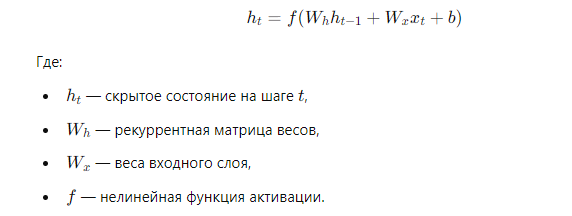

Когда мы выполняем обратное распространение ошибки через сеть, мы должны вычислять градиенты для каждого временного шага, начиная с текущего и возвращаясь к первому шагу. Это приводит к последовательному умножению весов 𝑊ℎ , которые передаются через множество шагов. Если эти веса слишком малы или их значения меньше единицы, многократное умножение приводит к экспоненциальному уменьшению величины градиента.

Для шага t градиент ошибки по отношению к весам можно представить как произведение частных производных от шага t к шагу 

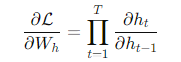

Если значения производных близки к нулю, то их произведение быстро уменьшается при увеличении длины последовательности, и это приводит к затуханию градиентов.

2. **Экспоненциальное уменьшение градиентов:** В случае, если нормы весов Wh  меньше единицы, при многократном умножении весов на себя значения градиентов уменьшаются экспоненциально. Это делает градиенты слишком маленькими на начальных шагах последовательности, что приводит к тому, что сеть не может эффективно обучаться на данных, которые поступают на ранних шагах временной последовательности.

Например, если 𝑊ℎ = 0.5 n раз, градиенты будут затухать экспоненциально, как 0.5^n, и быстро станут близкими к нулю.

3. **Длинные зависимости:** Когда последовательность слишком длинная, информация о более ранних шагах "забывается". При каждом шаге RNN сеть передает только краткую сводку (скрытое состояние) на следующий шаг, и эта сводка может не сохранять всю важную информацию. Затухание градиентов делает невозможным правильную настройку весов для данных из начала последовательности, так как вклад этих шагов в градиент становится слишком мал.


## Какие есть модификации RNN?

**LSTM** — одна из самых популярных и широко используемых модификаций RNN. Она была разработана для решения проблемы затухающих градиентов, что позволяет лучше запоминать информацию на длительных временных интервалах.

**Основные компоненты LSTM:**
- Ячейка памяти: Хранит информацию в течение длительного времени.
- Входной заслон (input gate): Определяет, какое новое значение должно быть записано в ячейку памяти.
- Выходной заслон (output gate): Определяет, какая часть информации из ячейки памяти будет использована для выхода.
- Заслонка забывания (forget gate): Решает, какая информация из ячейки памяти будет забыта.

Эти механизмы позволяют LSTM сохранять и обновлять информацию на нескольких временных интервалах, что делает её устойчивой к затуханию градиентов.

Формулы для LSTM:
Заслонки управляются сигмоидной функцией, а обновление состояния происходит через гейтированную связь.

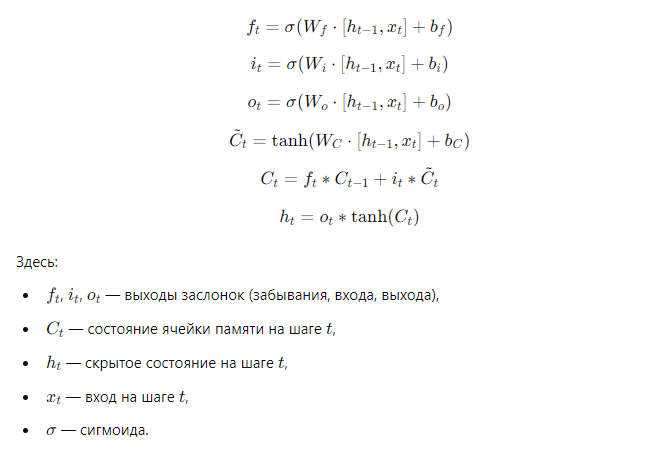


**GRU (Gated Recurrent Unit)**

**GRU** — это упрощенная версия LSTM, которая имеет меньше параметров и зачастую обучается быстрее, сохраняя при этом способность сохранять долговременные зависимости. В GRU нет отдельной ячейки памяти, и объединяются заслонки для обновления и забывания информации.

Основные компоненты GRU:
- Заслонка обновления (update gate): Определяет, сколько новой информации сохранить.
- Заслонка сброса (reset gate): Контролирует, сколько информации из предыдущих шагов забыть.

Формулы для GRU:

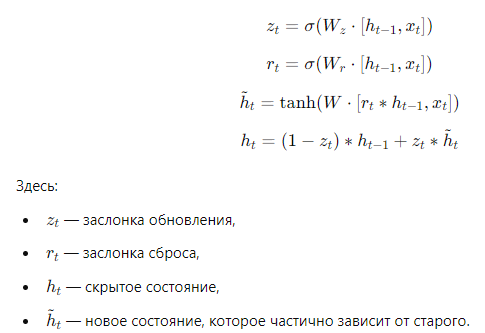

## Как lstm и gru борются с затуханием градиентов?

Механизм, предотвращающий затухание градиентов:
Главное отличие LSTM — это использование состояния ячейки, которое может сохранять информацию почти неизменной в течение многих шагов. В результате градиенты не убывают экспоненциально, как это происходит в обычных RNN, поскольку функция активации скрытого состояния не применяется непосредственно к состоянию ячейки, что предотвращает сильное затухание производных.

В GRU, как и в LSTM, заслонка обновления позволяет сохранять важные зависимости на длительных временных интервалах. Вместо того, чтобы обновлять скрытое состояние каждый раз целиком, заслонка обновления регулирует, насколько обновляются веса. Это делает возможным сохранение информации через большое количество временных шагов без значительного затухания градиентов.

# Transformers

## Расскажи как устроен Attention (Механизм внимания)?

**Attention (механизм внимания)** — это ключевая часть многих современных моделей машинного обучения, таких как трансформеры, и используется для определения того, какие части входных данных наиболее важны для предсказания. Внимание позволяет модели сосредоточиться на разных частях входных данных в зависимости от контекста.

**Как вычисляется Attention?**
В основе внимания лежит идея, что каждое входное слово (или элемент данных) влияет на выходное предсказание с различной степенью важности. Эта важность определяется через специальные веса, которые рассчитываются с помощью скалярных произведений между вопросами (query), ключами (key) и значениями (value).

**Шаги вычисления self-attention**
Для одного шага механизма self-attention, когда у нас есть несколько токенов входной последовательности (например, слова), каждый из которых представлен вектором:

1. Получение запросов (Q), ключей (K) и значений (V):

Для каждого токена входной последовательности формируются три вектора: query (запрос), key (ключ) и value (значение). Эти векторы вычисляются через линейные преобразования, где используются обучаемые веса:


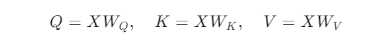\
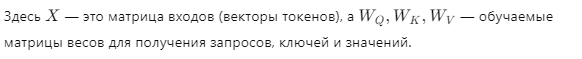

2. Вычисление весов внимания (Attention Weights):

- Для определения важности каждого токена относительно других, вычисляется внимание как скалярное произведение между векторами query и key:

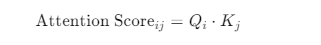

Это даёт оценку того, насколько токен j важен для токена i. Однако такие оценки могут быть слишком большими или малыми, поэтому их необходимо нормализовать.

3. Масштабирование и применение softmax:

- Для масштабирования оценок используют деление на sqrt(dk), где  dk
​
  — размерность ключей. Это нужно для предотвращения слишком больших значений, которые могут быть вредны для градиентных вычислений:

  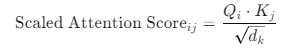

Затем эти значения пропускают через softmax, чтобы получить вероятностное распределение, которое суммируется в 1. Это даёт веса внимания для каждого токена относительно других:
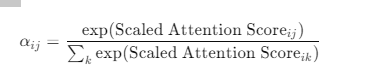

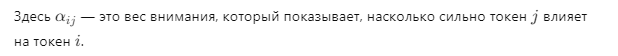

4. Вычисление итогового внимания:

- Итоговое значение внимания для каждого токена получается как взвешенная сумма значений value (V) для всех токенов с учётом весов внимания:
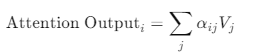

Это и есть выход механизма внимания для токена i, который содержит информацию о том, как все остальные токены влияют на него.

5. Многоголовое внимание (Multi-Head Attention):

Для усиления модели используют механизм многоголового внимания. Это значит, что внимание вычисляется несколько раз с разными весами  (каждая такая пара весов называется "головой"). Результаты всех голов конкатенируются и пропускаются через ещё одну линейную проекцию:

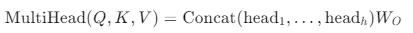

Каждая голова имеет свою собственную интерпретацию входных данных, что позволяет модели учиться на разных аспектах данных одновременно.

## В чем разница query и key?

В механизме **self-attention** архитектуры Transformer, векторы **query** (запрос) и **key** (ключ) играют ключевые роли в процессе вычисления внимания, но они выполняют разные функции.

 1. **Query (запрос)**
Вектор **query** представляет собой запрос, который ищет важную информацию в последовательности. Каждый токен (слово) во входной последовательности имеет свой вектор query. Цель query — вычислить, насколько данный токен "внимателен" к остальным токенам в последовательности.

Когда модель обрабатывает токен, она с помощью query «спрашивает», какие другие токены важны для текущего.

 2. **Key (ключ)**
Вектор **key** используется для сравнения с query. Он кодирует информацию о каждом токене и представляет его как потенциальный источник важной информации для других токенов. Каждый токен в последовательности также имеет свой собственный вектор key.

Key используется для того, чтобы решать, насколько важен каждый токен относительно другого. По сути, ключ содержит описание токена, на основе которого будет вычислено, насколько он релевантен к запросу другого токена.

 3. **Как взаимодействуют query и key**
Когда токен "А" использует свой вектор query, он вычисляет **скалярное произведение** этого вектора с векторами key всех других токенов (включая себя). Эти скалярные произведения показывают, насколько каждый токен релевантен текущему запросу. Результат затем нормализуется с помощью softmax, чтобы получить веса внимания, которые указывают, насколько важно каждое слово для данного токена.

 4. **Пример:**
Допустим, у нас есть предложение: *"The cat sat on the mat."*

- Для токена "cat" вектор query будет задавать вопрос: "Какие токены важны для моего понимания?".
- Для каждого другого токена (например, "The", "sat", "on") будут вычисляться скалярные произведения между их векторами key и query токена "cat". Эти значения покажут, насколько каждый из этих токенов релевантен "cat".

 5. **Краткая разница:**
- **Query** — это вектор, с помощью которого каждый токен "спрашивает" другие токены: "Насколько вы важны для меня?".
- **Key** — это вектор, который каждый токен "предлагает", описывая свою информацию для того, чтобы другие токены могли оценить его важность.